In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## Intron chain, TSS, TES triplet analysis

In [20]:
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')

# get references for computing triplets
t_df, regions, counts = get_ref_triplets(sg,
                                         df)

# add numbers for observed
temp = get_subset_triplets(t_df, 
                    df,
                    min_tpm=1,
                    groupby='all',
                    source_name='obs')         
counts = pd.concat([counts, temp])

# add numbers for obs+GENCODE
temp = get_subset_triplets(t_df,
                           source_name='all')
counts = pd.concat([counts, temp])

# add numbers for each library
temp = get_subset_triplets(t_df, 
                    df,
                    min_tpm=1,
                    groupby='sample') 
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687
Found 49 total samples
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 559881
# genes >= 1 tpm:

In [16]:
counts.loc[counts.gname == 'ELN']

tss  intron_chain  tes  tss_ic_tes  splicing_ratio         source  \
21978.0    7            34   13          34        3.400000        GENCODE   
21978.0    3           139    7         139       27.800000            obs   
21978.0    7           158   13         158       15.800000            all   
21978.0    2             7    3           7        2.800000           a673   
21978.0    2             7    3           7        2.800000        adipose   
21978.0    1             1    1           1        1.000000  adrenal gland   
21978.0    2            12    3          12        4.800000          colon   
21978.0    1             2    2           2        1.333333             h1   
21978.0    2             2    2           2        1.000000          h1_de   
21978.0    2           134    3         134       53.600000     h9_chondro   
21978.0    2            41    4          41       13.666667          heart   
21978.0    2             2    2           2        1.000000          hffc6   
21978.0    1             3    1           3        3.000000          imr90   
21978.0    2             6    3           6        2.400000         kidney   
21978.0    2             4    2           4        2.000000          liver   
21978.0    2            18    3          18        7.200000           lung   
21978.0    2             5    3           5        2.000000         muscle   
21978.0    2             7    3           7        2.800000          ovary   
21978.0    1             2    1           2        2.000000     pgp1_astro   
21978.0    2             4    2           4        2.000000      pgp1_endo   
21978.0    3            41    6          41        9.111111        vessels   
21978.0    1             1    1           1        1.000000          wtc11   

                        gid gname         biotype biotype_category     tf  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False

In [4]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687


In [7]:
counts.loc[(counts.gname=='ELN')&(counts.source=='obs')]

tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
21978.0    3           139    7         139            27.8    obs   

                        gid gname         biotype biotype_category     tf  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False

In [5]:
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
temp = compute_triplets(t_df,
                        df,
                        min_tpm=1,
                        groupby='all')

this is the old one
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687


In [6]:
temp.head()

tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
57103    5             7    4           7        1.555556    all   
57102    1             1    1           1        1.000000    all   
53259    1             8    3           8        4.000000    all   
3804     3             5    3           5        1.666667    all   
3799     5             7    3           7        1.750000    all   

                      gid     gname         biotype biotype_category     tf  
57103  ENSG00000000003.14    TSPAN6  protein_coding   protein_coding  False  
57102   ENSG00000000005.5      TNMD  protein_coding   protein_coding  False  
53259  ENSG00000000419.12      DPM1  protein_coding   protein_coding  False  
3804   ENSG00000000457.13     SCYL3  protein_coding   protein_coding  False  
3799   ENSG00000000460.16  C1orf112  protein_coding   protein_coding  False

In [14]:
temp = t_df.loc[t_df.ttrip.duplicated(keep=False)].copy(deep=True)
temp = temp.sort_values(by='ttrip')
n = len(temp.ttrip.unique().tolist())
print('Found {} transcripts w/ duplicated triplets'.format(n))
print(temp.head())

Found 1091 transcripts w/ duplicated triplets
             tname                 gid   gname  \
37126   ABCB11-201   ENSG00000073734.9  ABCB11   
239683  ABCB11-207   ENSG00000073734.9  ABCB11   
237242   ABCC2-204  ENSG00000023839.11   ABCC2   
55762    ABCC2-202  ENSG00000023839.11   ABCC2   
59103    ABCC4-201  ENSG00000125257.14   ABCC4   

                                                     path                tid  \
37126   [135523, 135524, 135525, 135526, 135527, 13552...  ENST00000263817.7   
239683  [135576, 135524, 135525, 135526, 135527, 13552...  ENST00000650372.1   
237242  [483394, 483395, 483396, 483397, 483398, 48339...  ENST00000647814.1   
55762   [483469, 483395, 483396, 483397, 483398, 48339...  ENST00000370449.9   
59103   [615868, 615808, 615809, 615810, 615811, 61581...  ENST00000376887.9   

                                                 loc_path  annotation novelty  \
37126   [545237, 545236, 545235, 545234, 545233, 54523...        True   Known   
239683  [5

In [15]:
def check_gene(df, counts, gname):
    print(t_df.loc[t_df.gname == gname, 'tss_gene_num'].max())
    print(t_df.loc[t_df.gname == gname, 'tes_gene_num'].max())
    print(t_df.loc[t_df.gname == gname, 'intron_chain_gene_num'].max())
    print()
    print(len(t_df.loc[t_df.gname == gname, 'tss_cluster'].unique().tolist()))
    print(len(t_df.loc[t_df.gname == gname, 'tes_cluster'].unique().tolist()))
    print(len(t_df.loc[t_df.gname == gname, 'intron_chain'].unique().tolist()))
    print()
    print(counts.loc[(counts.gname == gname)&(counts.source=='all')])

In [16]:
# check_gene(t_df, counts, 'COL1A1')
check_gene(t_df, counts, 'ELN')

7
13
158

7
13
158

         tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
21978.0    7           158   13         158            15.8    all   

                        gid gname         biotype biotype_category     tf  
21978.0  ENSG00000049540.16   ELN  protein_coding   protein_coding  False  


In [45]:
# add triplets for samples
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
temp = compute_triplets(t_df,
                        df,
                        min_tpm=1,
                        groupby='sample')
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

In [11]:
# save all observed triplets
temp = counts.loc[counts.source == 'obs']
temp.to_csv('obs_triplets.tsv', sep='\t', index=False)

In [12]:
# save triplets
counts.to_csv('triplets.tsv', sep='\t', index=False)

## Plotting

In [17]:
c_dict, order = get_biosample_colors()
c_dict['GENCODE'] = 'k'
c_dict['obs'] = 'k'
# counts = pd.read_csv('triplets.tsv', sep='\t')

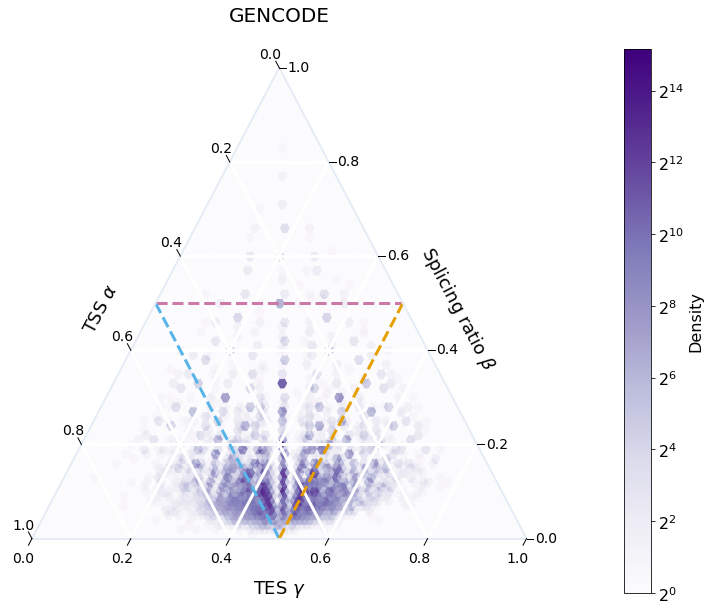

In [18]:
# gencode
temp = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'GENCODE'},
            density=True,
            density_scale=100,
            sectors=True,
            density_cmap='Purples',
            log_density=True,
            scatter=False,
            title='GENCODE',
            opref='figures/human')

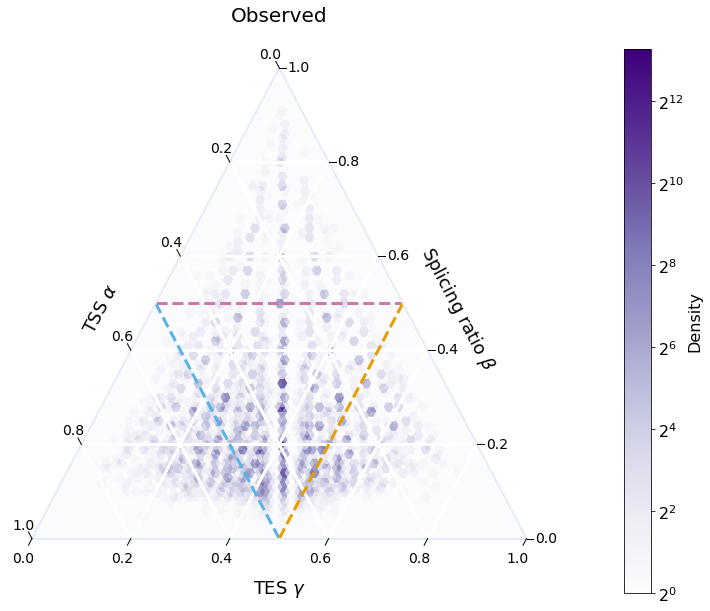

In [10]:
# observed
temp = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'obs'},
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            title='Observed',
            opref='figures/human')

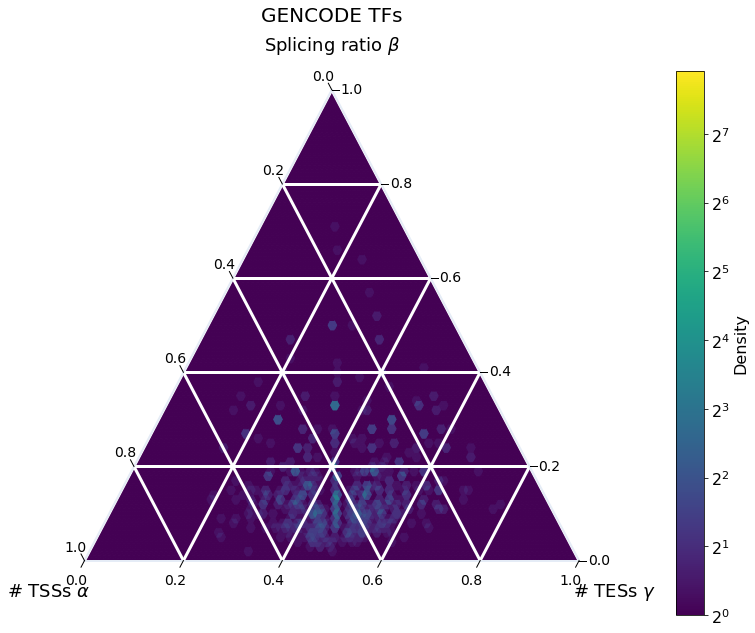

In [19]:
# all tfs in gencode
temp = plot_dorito(counts,
                top='splicing_ratio',
                # hue='intron_chain',
                scatter=False,
                subset={'source': 'GENCODE', 'tf': True},
                jitter=True,
                density=True,
                density_scale=100,
                log_density=True,
                title='GENCODE TFs',
                opref='figures/human')

[100, 100, array([107.25138986]), array([142.12021047]), array([166.07239243])]


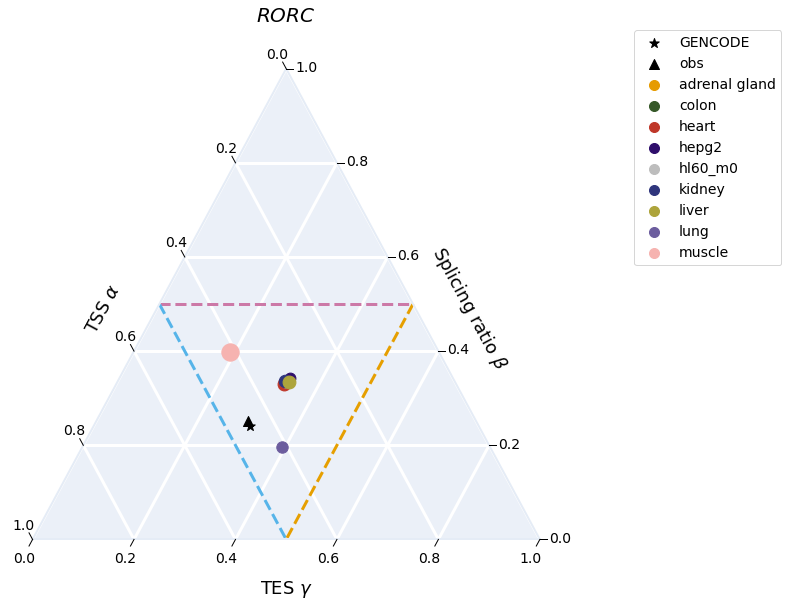

In [12]:
# RORC
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='RORC',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=True,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([107.25138986]), array([142.12021047]), array([166.07239243])]


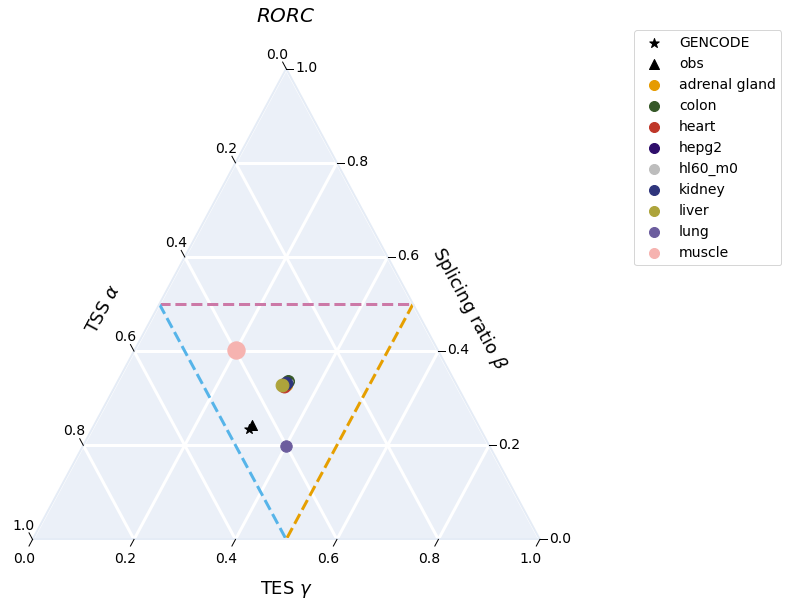

In [21]:
# RORC
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='RORC',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=True,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

In [ ]:
# ELN
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='ELN',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([201.19109322]), array([223.92923021]), array([120.99848526])]


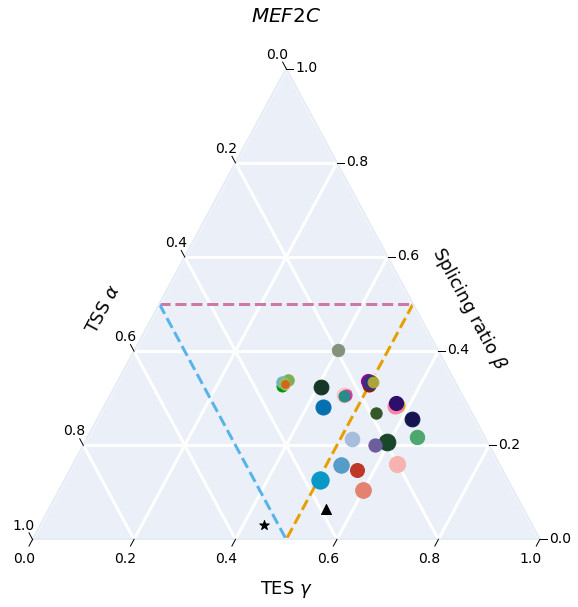

In [8]:
# MEF2C
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

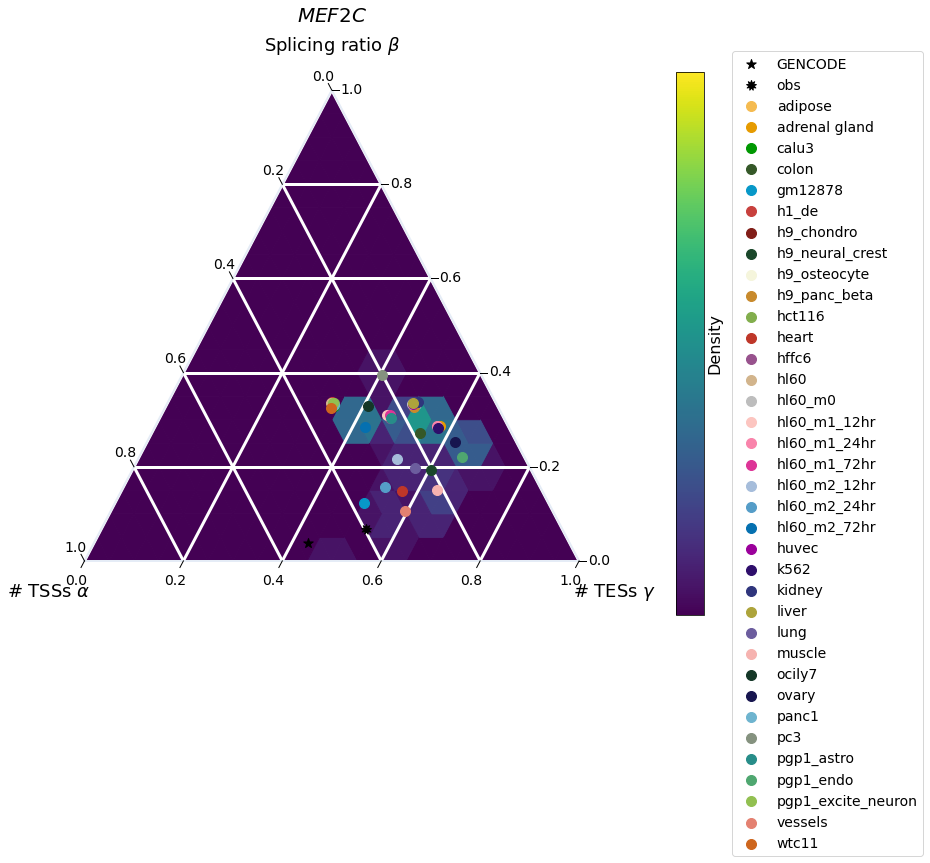

In [25]:
# MEF2C
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([210.26375515]), array([202.68817632]), array([174.83256468])]


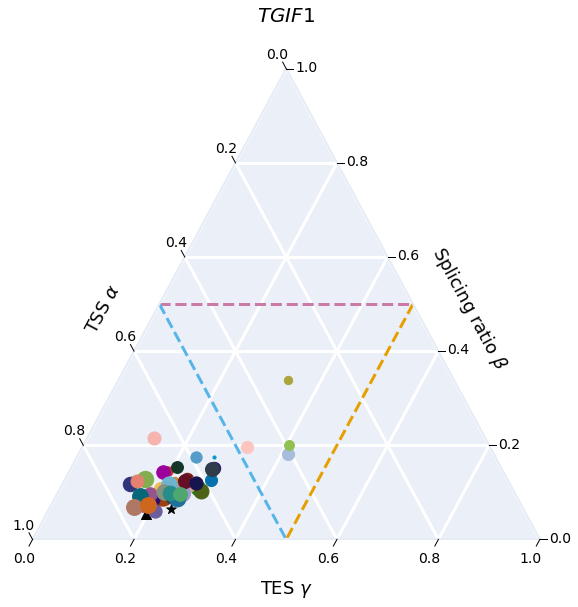

In [9]:
# TGIF1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TGIF1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([109.61710158]), array([140.8229839]), array([136.38606785])]


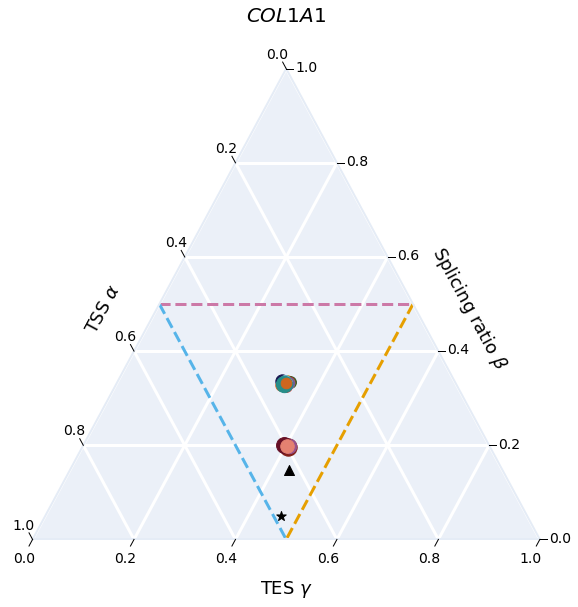

In [10]:
# COL1A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([91.86164562]), array([124.58837109]), array([128.41527152])]


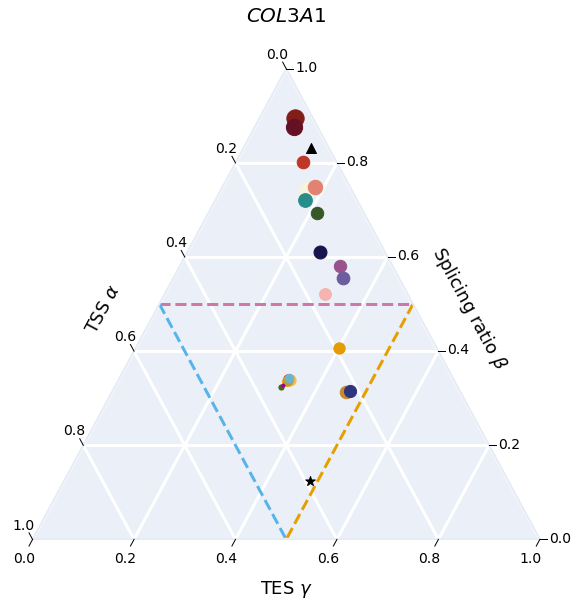

In [11]:
# COL3A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

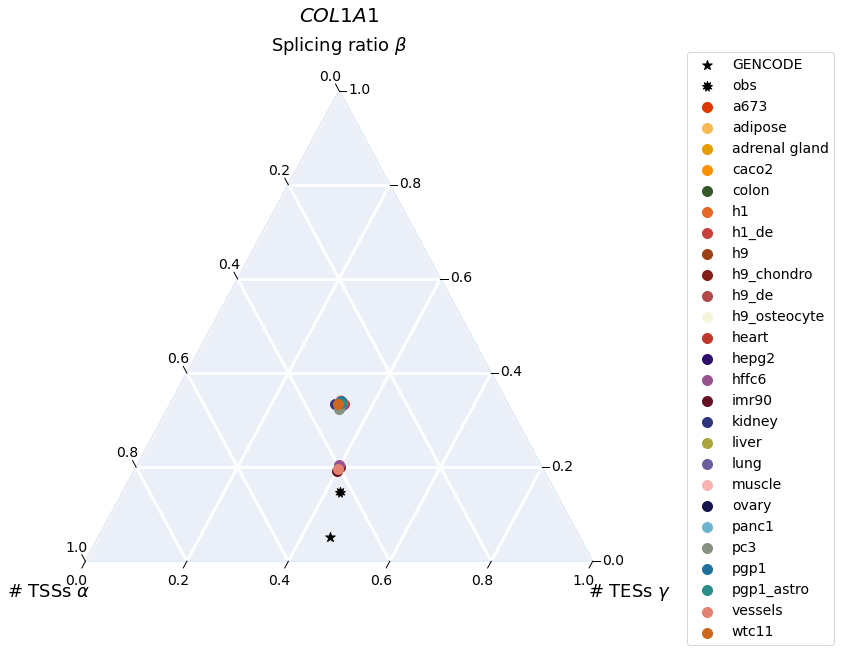

In [5]:
# COL1A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))},
            opref='figures/human')

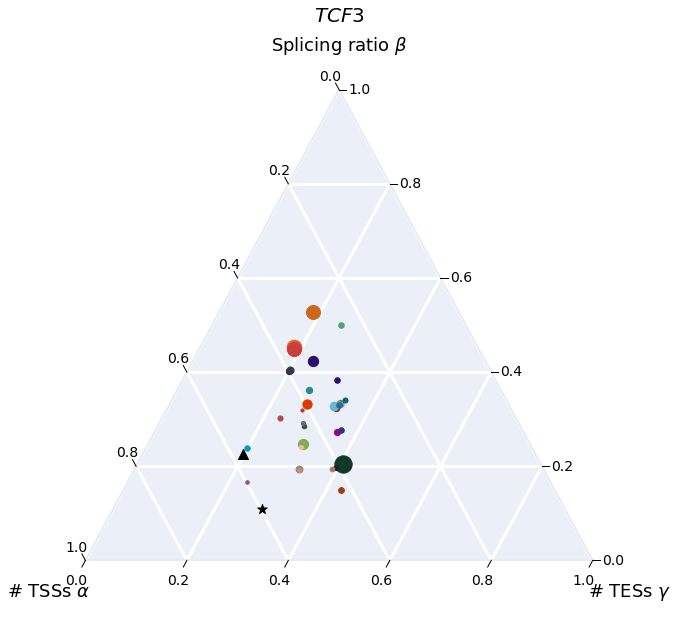

In [17]:
# TCF3
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            size='tpm', 
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            jitter=True,
            legend=False,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))},
            opref='figures/human')

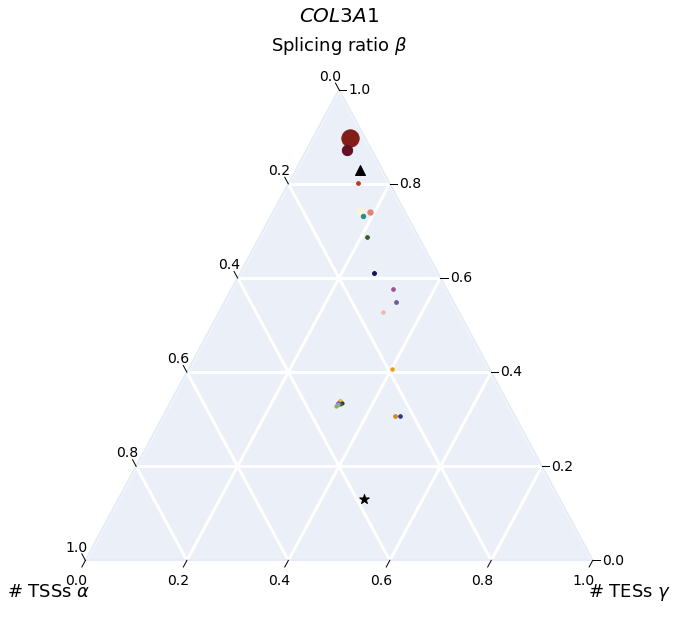

In [20]:
# COL3A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            size='tpm', 
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            jitter=True,
            legend=False,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))},
            opref='figures/human')

In [1]:
# DES
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='DES',
            size='tpm', 
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            jitter=True,
            legend=False,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))},
            opref='figures/human')

NameError: name 'plot_dorito' is not defined

In [23]:
counts.loc[(counts.gname == 'TCF3')&(counts.source=='obs')]

tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
118682    9            21    3          21             3.5    obs   

                       gid gname         biotype biotype_category    tf  \
118682  ENSG00000071564.14  TCF3  protein_coding   protein_coding  True   

       biosample  tpm  
118682       NaN  NaN

tss  intron_chain  tes  tss_ic_tes  splicing_ratio         source  \
164969    2             4    2           4             2.0  adrenal gland   
346512    3             6    2           6             2.4          heart   
575046    3             4    2           4             1.6         muscle   

                       gid gname         biotype biotype_category    tf  \
164969  ENSG00000071564.14  TCF3  protein_coding   protein_coding  True   
346512  ENSG00000071564.14  TCF3  protein_coding   protein_coding  True   
575046  ENSG00000071564.14  TCF3  protein_coding   protein_coding  True   

            biosample        tpm  total  tss_ratio  tes_ratio  top_ratio  \
164969  adrenal gland  14.802999    6.0   0.333333   0.333333   0.333333   
346512          heart  12.782108    7.4   0.405405   0.270270   0.324324   
575046         muscle  21.980713    6.6   0.454545   0.303030   0.242424   

        a_jitter  b_jitter  c_jitter  
164969  0.334430  0.336976  0.334287  
346512  0.402717  0.324329  0.268365  
575046  0.456757  0.236218  0.311267

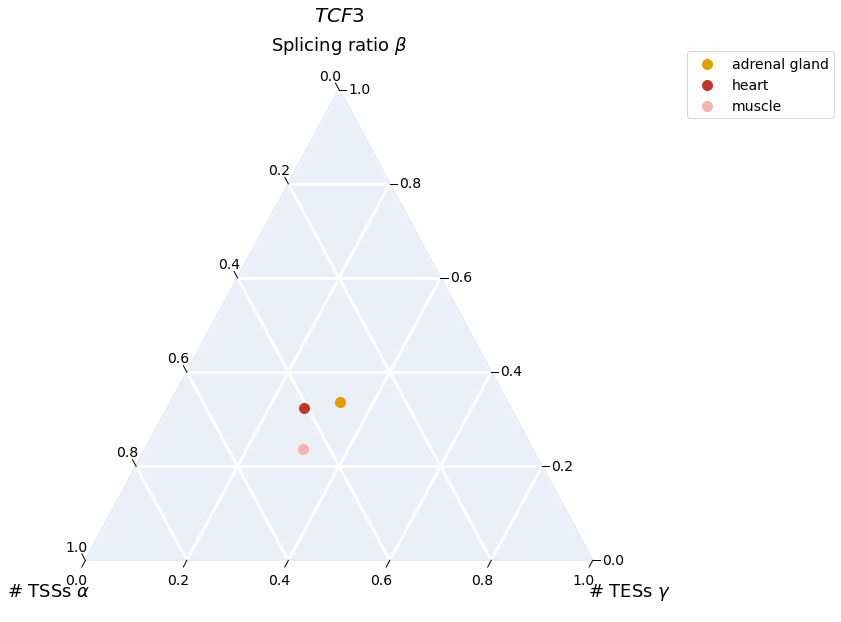

In [25]:
subset = ['heart', 'adrenal gland', 'muscle']
# TCF3
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            subset={'source':subset})
temp.head()

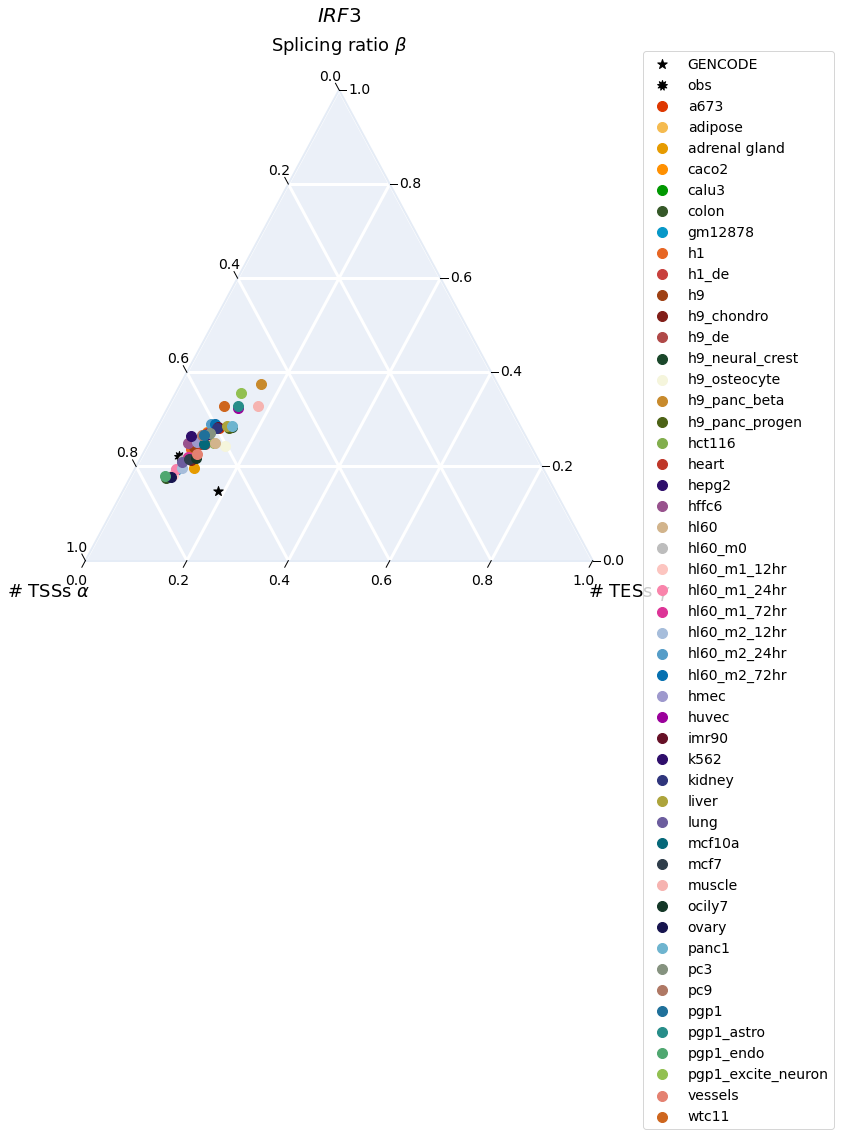

In [26]:
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='IRF3',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))})

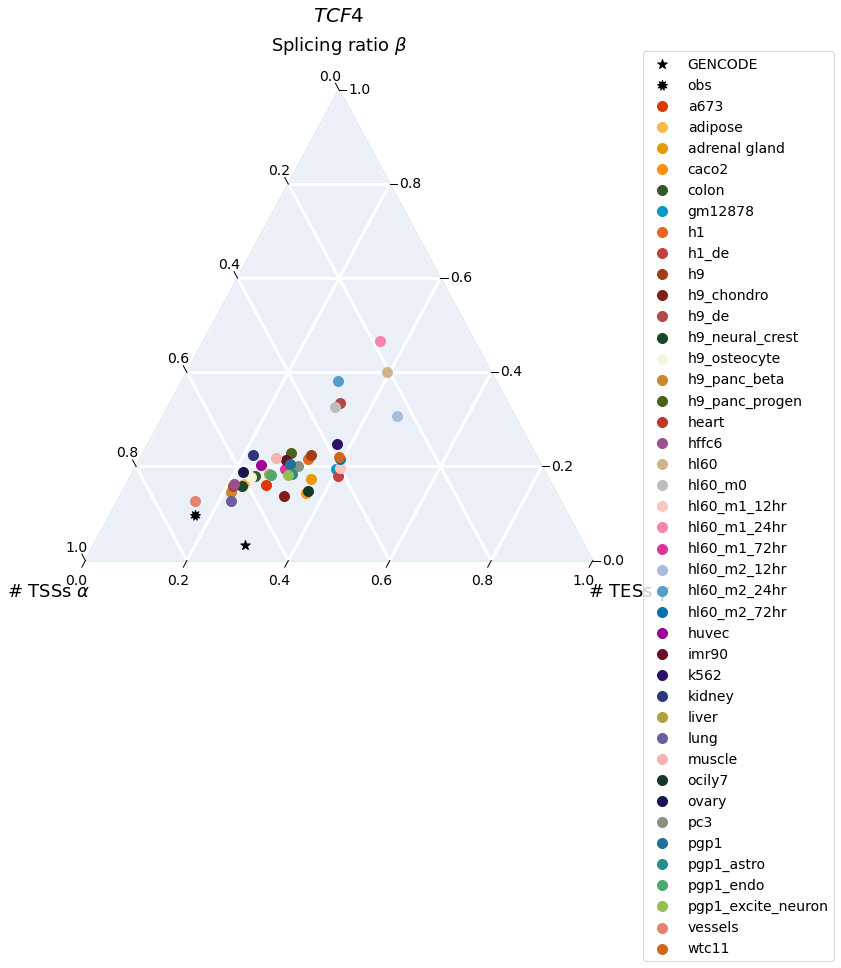

In [27]:
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF4',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))})

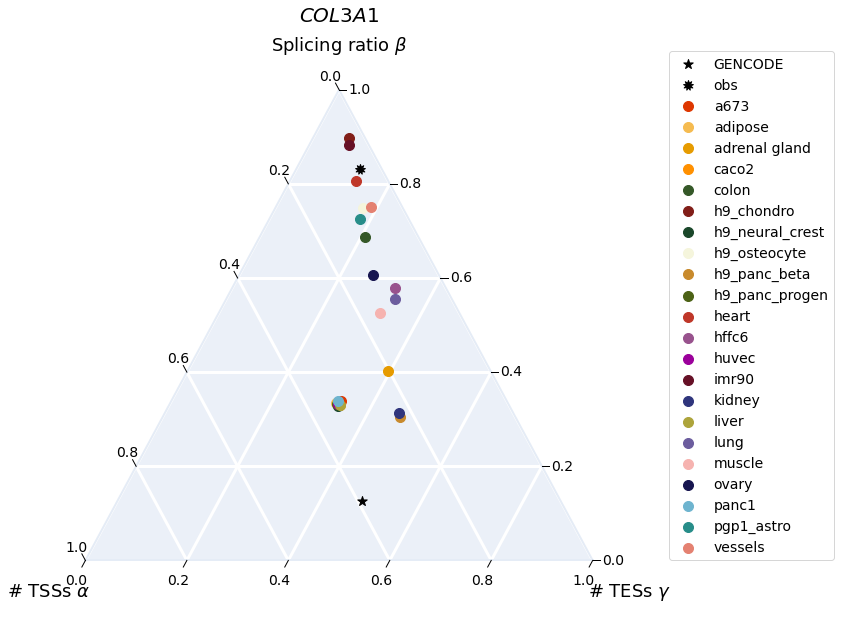

In [7]:
# COL3A1
c_dict = c_dict
c_dict['GENCODE'] = 'k'
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))},)

In [8]:
counts.loc[(counts.gname == 'COL3A1')&(counts.source=='obs')]
counts.loc[counts.gname == 'COL3A1']

tss  intron_chain  tes  tss_ic_tes  splicing_ratio           source  \
12388     4             6    5           6        1.333333          GENCODE   
71168     4            43    5          43        9.555556              all   
129110    1            39    3          39       19.500000              obs   
150384    1             1    1           1        1.000000             a673   
160773    1             1    1           1        1.000000          adipose   
172783    1             3    2           3        2.000000    adrenal gland   
185838    1             1    1           1        1.000000            caco2   
211062    1            10    2          10        6.666667            colon   
277215    1            38    2          38       25.333333       h9_chondro   
299333    1             1    1           1        1.000000  h9_neural_crest   
309763    1            13    2          13        8.666667     h9_osteocyte   
319886    1             2    2           2        1.333333     h9_panc_beta   
330647    1             1    1           1        1.000000   h9_panc_progen   
355099    1            18    2          18       12.000000            heart   
382330    1            11    3          11        5.500000            hffc6   
484095    1             1    1           1        1.000000            huvec   
495365    1            32    2          32       21.333333            imr90   
520219    1             2    2           2        1.333333           kidney   
532343    1             1    1           1        1.000000            liver   
545416    1            10    3          10        5.000000             lung   
581857    1             5    2           5        3.333333           muscle   
605133    1             7    2           7        4.666667            ovary   
617429    1             1    1           1        1.000000            panc1   
665072    1            12    2          12        8.000000       pgp1_astro   
700999    1            24    3          24       12.000000          vessels   

                       gid   gname         biotype biotype_category     tf  \
12388   ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
71168   ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
129110  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
150384  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
160773  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
172783  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
185838  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
211062  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
277215  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
299333  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
309763  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
319886  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
330647  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
355099  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
382330  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
484095  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
495365  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
520219  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
532343  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
545416  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
581857  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
605133  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
617429  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
665072  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
700

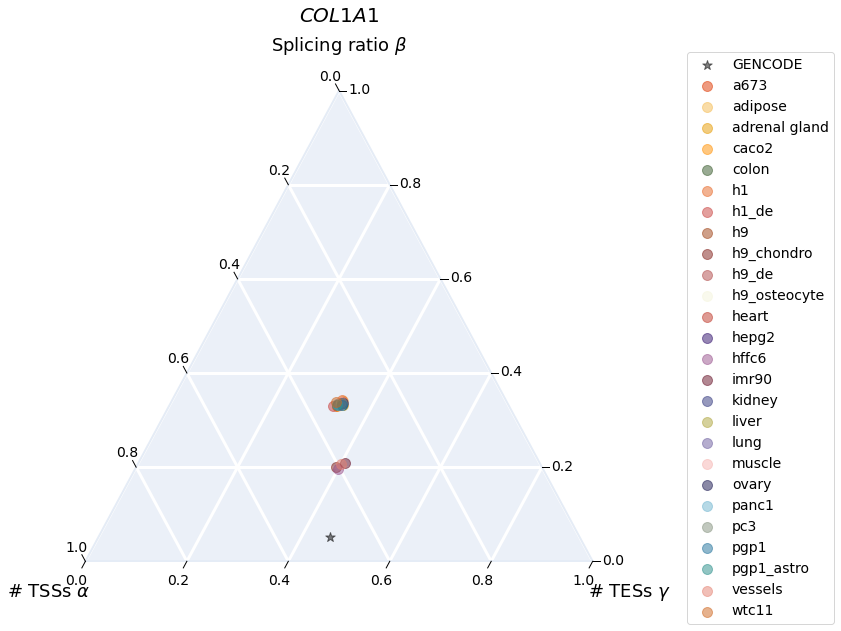

In [9]:
# COL1A1
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            alpha=0.5,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

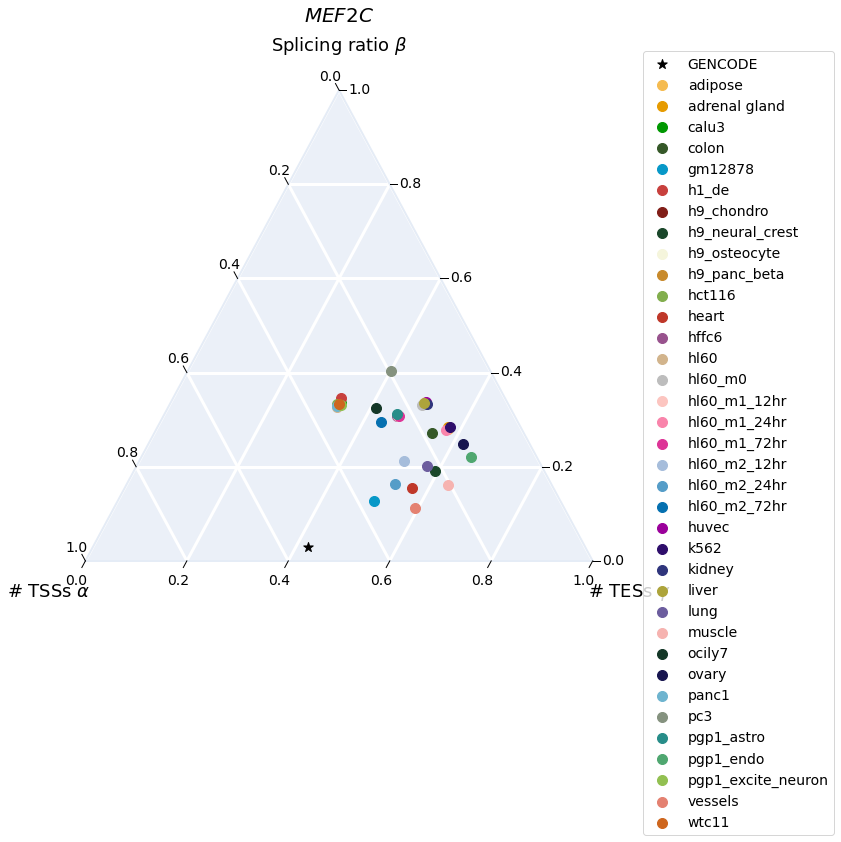

In [10]:
# MEF2C
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

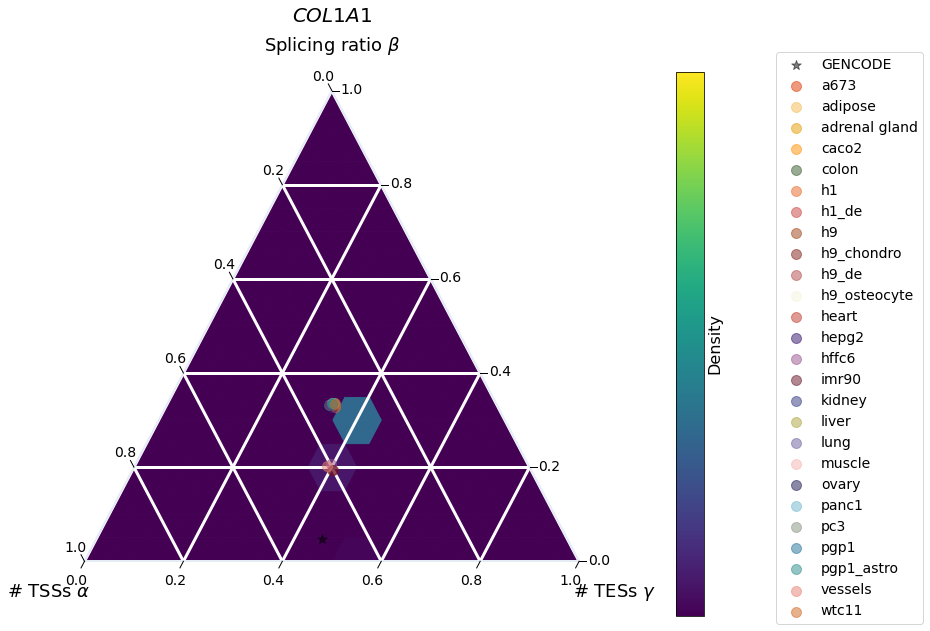

In [11]:
# COL1A1
c_dict = c_dict
c_dict['GENCODE'] = 'k'
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            density=True,
            density_scale=20,
            jitter=True,
            alpha=0.5,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

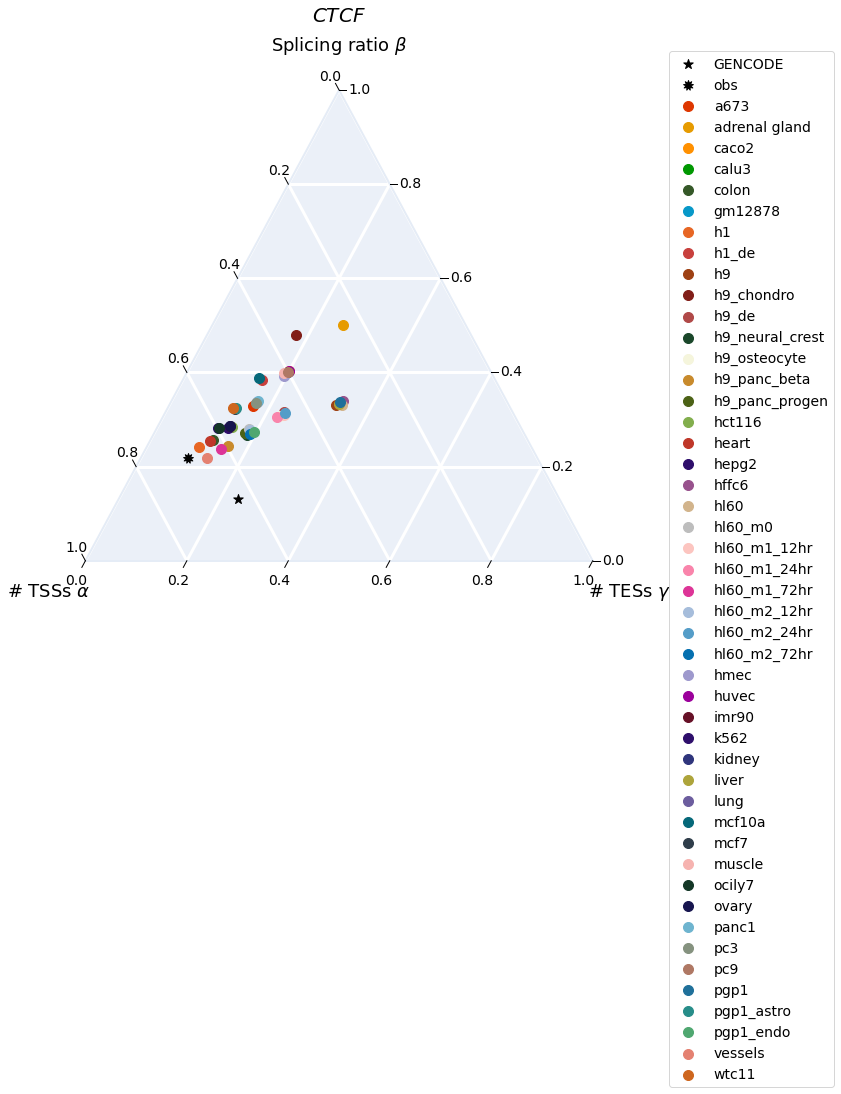

In [12]:
# CTCF
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='CTCF',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': (9,1,0)},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))},)

In [32]:
# counts.loc[counts.gname == 'CTCF', ['tss', 'tes', 'splicing_ratio', 'source']]

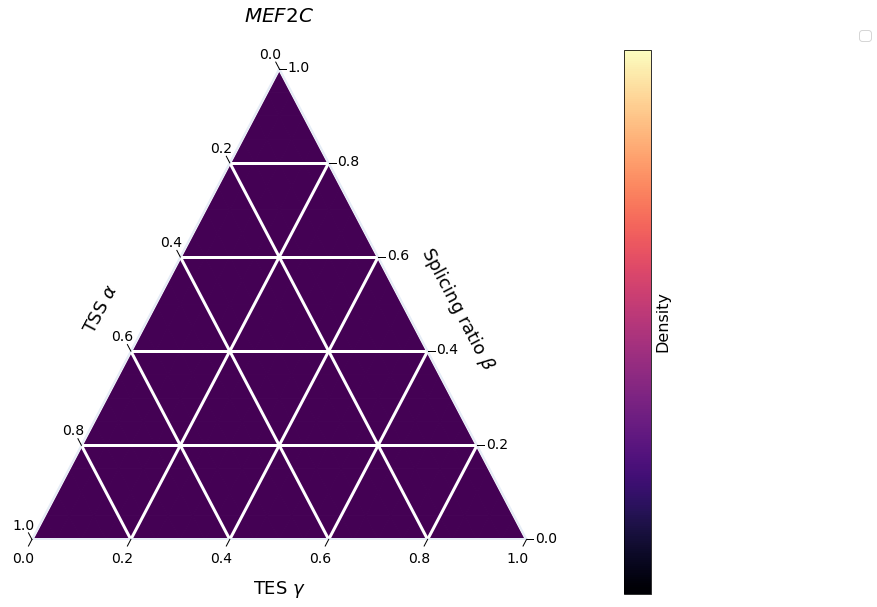

In [20]:
# MEF2C
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

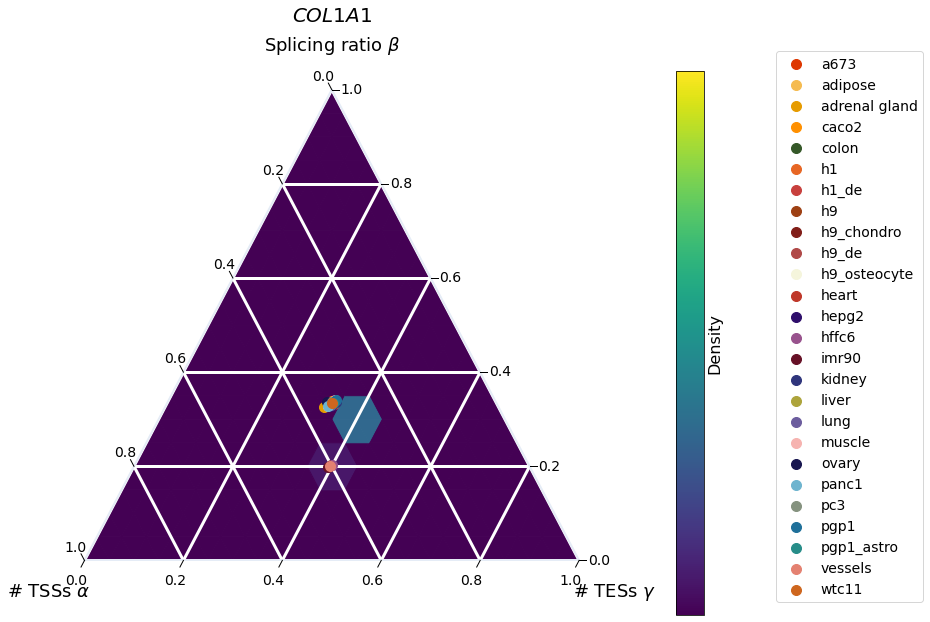

In [15]:
# COL1A1
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['GENCODE', 'all', 'obs']))})

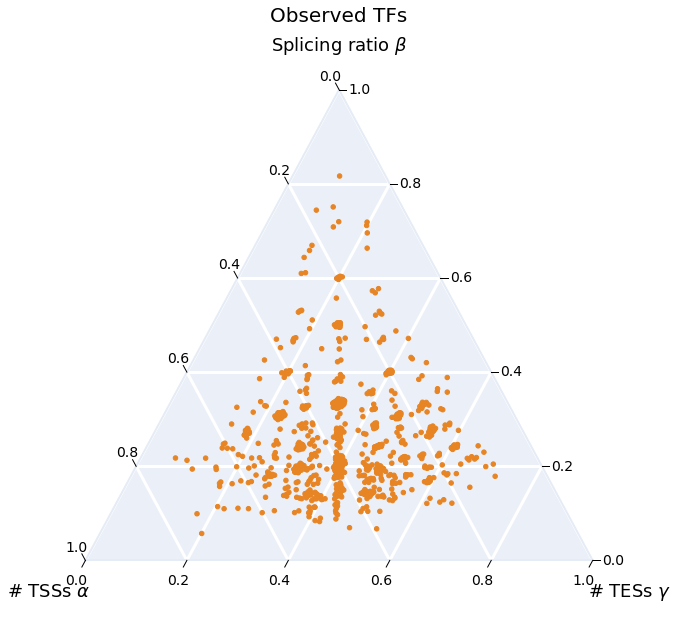

In [16]:
# all tfs in observed example
temp = plot_dorito(counts,
            top='splicing_ratio',
            # hue='intron_chain',
            # density=True, 
            # density_scale=20,
            jitter=True,
            subset={'source': 'obs', 'tf': True},
            title='Observed TFs')

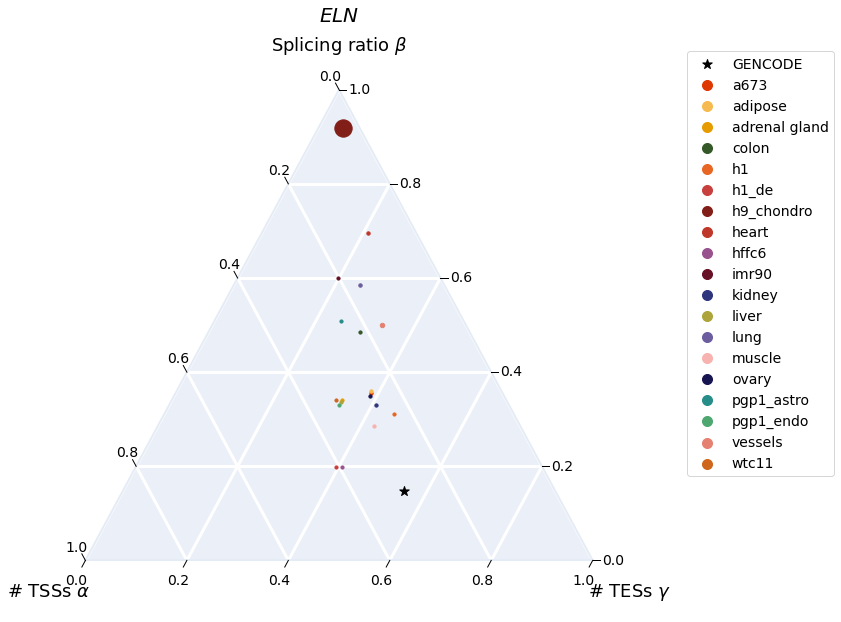

In [18]:
# ELN
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='ELN',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            size='tpm',
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

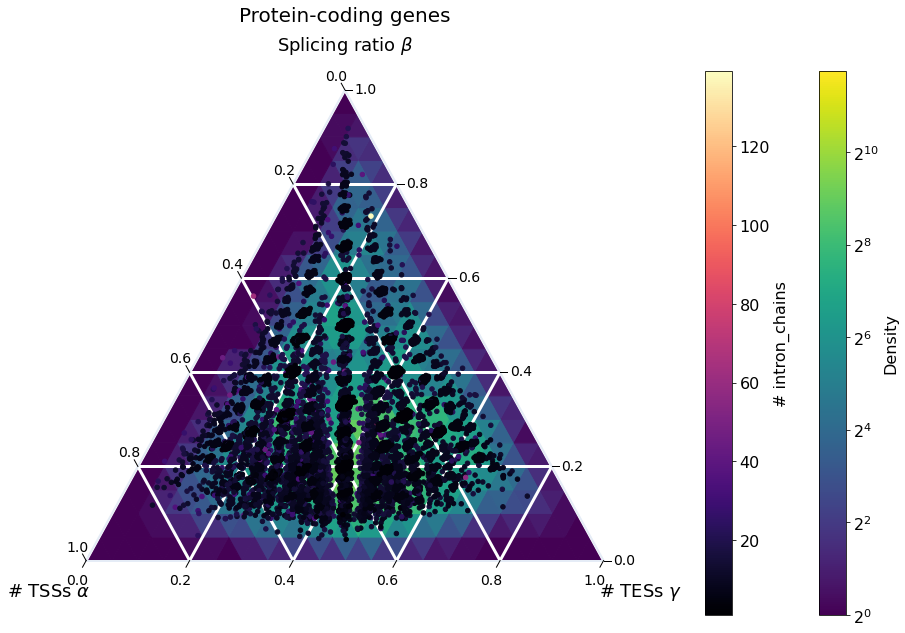

In [19]:
# all protein-coding genes in gencode example
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            density=True,
            density_scale=20,
            log_density=True,
            jitter=True,
            subset={'biotype': 'protein_coding', 'source': 'obs'},
            title='Protein-coding genes')

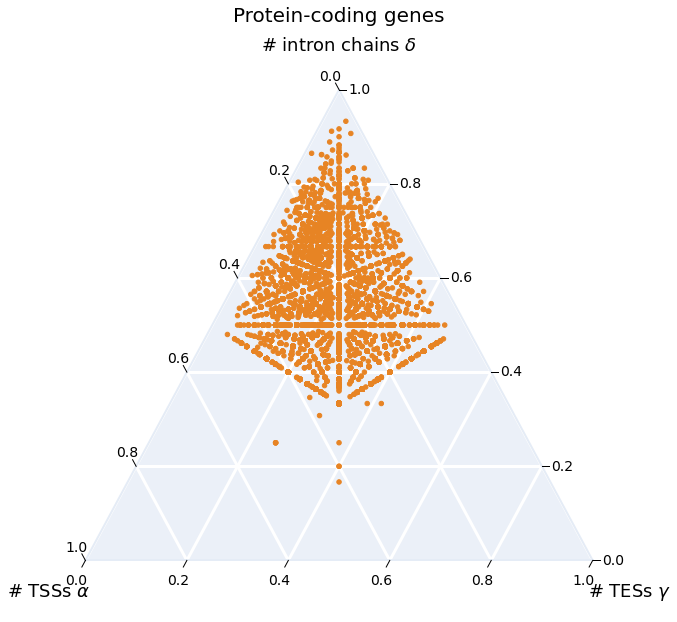

In [21]:
# all protein-coding genes in gencode example
_ = plot_dorito(counts,
            top='intron_chain',
            subset={'biotype': 'protein_coding', 'source': 'obs'},
            title='Protein-coding genes')

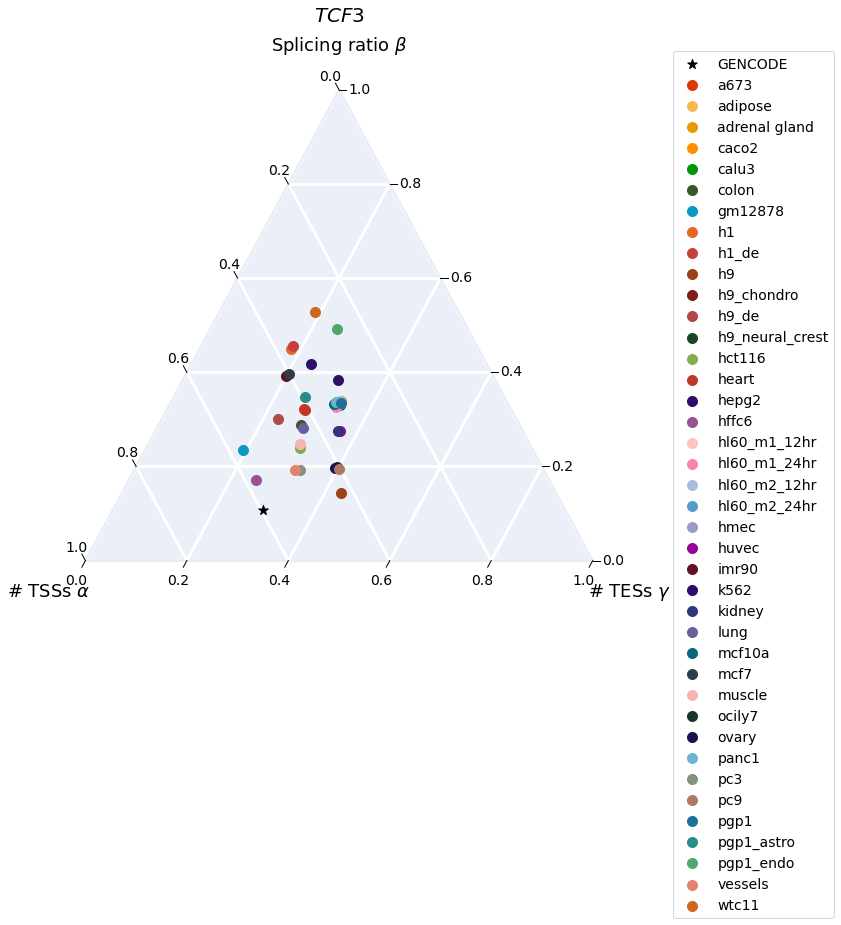

In [22]:
# gene example
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=c_dict,
            jitter=True,
            mmap={'GENCODE': '*'},
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

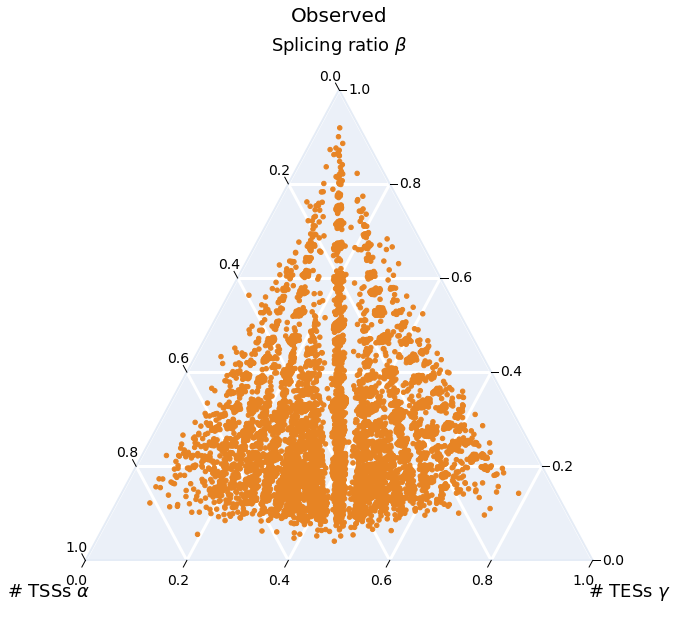

In [38]:
# obs example
_ = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'obs'},
            jitter=True,
            title='Observed')

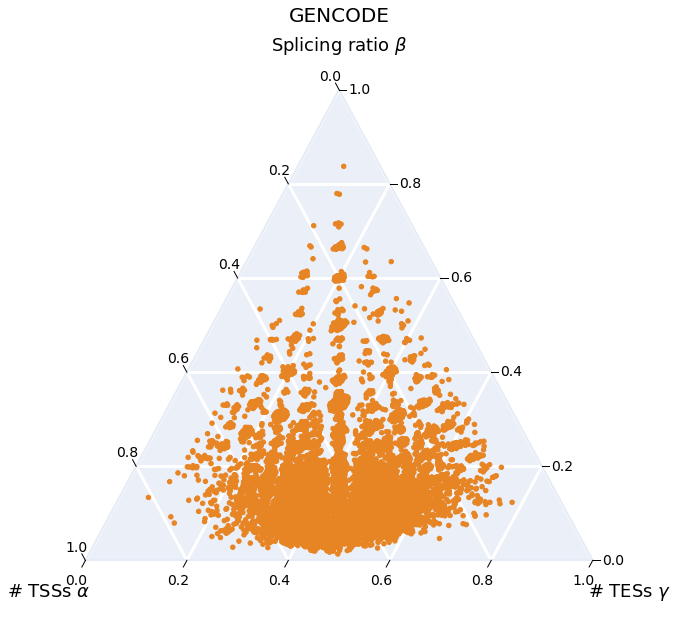

In [37]:
# gencode example
_ = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'GENCODE'},
            jitter=True, 
            title='GENCODE')

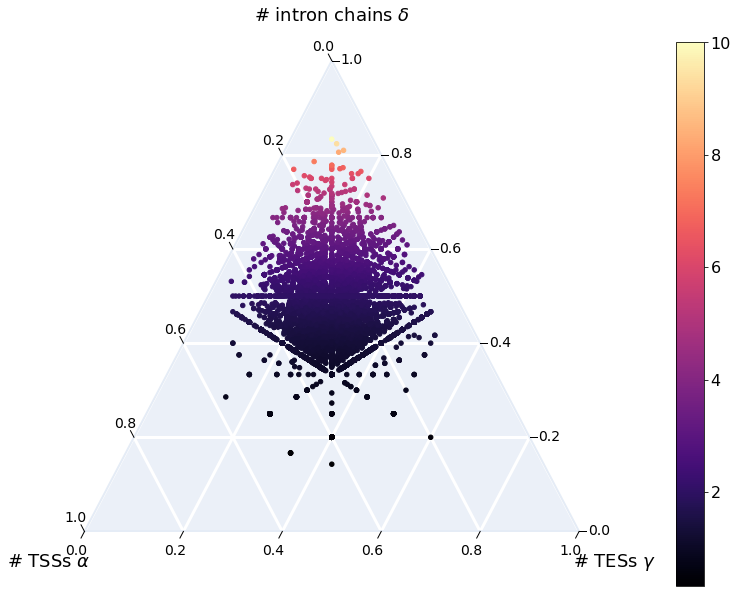

In [25]:
# gencode example - color by splicing ratio
_ = plot_dorito(counts,
            top='intron_chain',
            hue='splicing_ratio',
            subset={'source': 'GENCODE'})

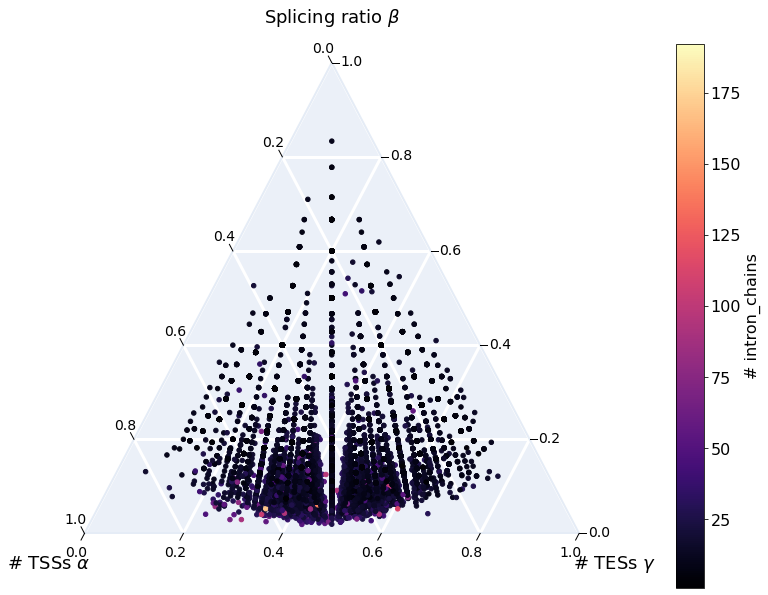

In [26]:
# gencode example - color by splicing ratio
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            subset={'source': 'GENCODE'})

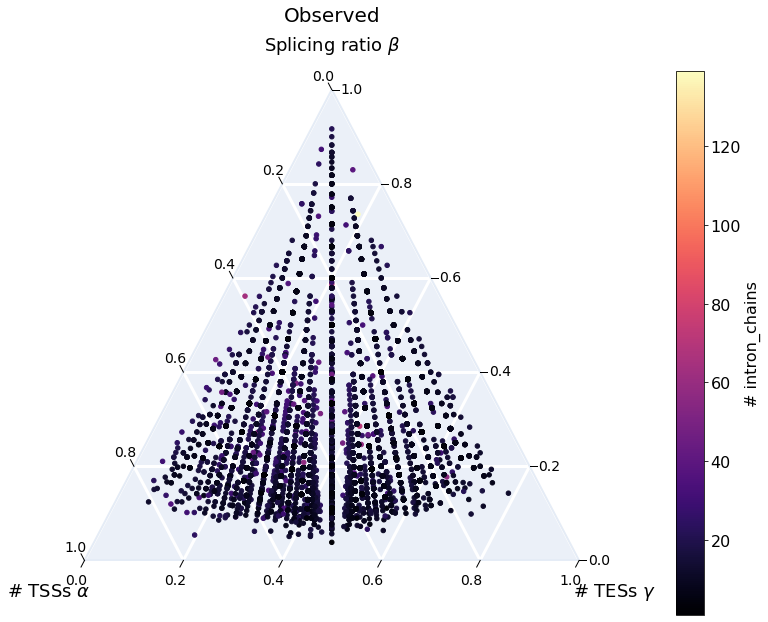

In [27]:
# observed example - color by n ic
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            subset={'source':'obs'},
            title='Observed')

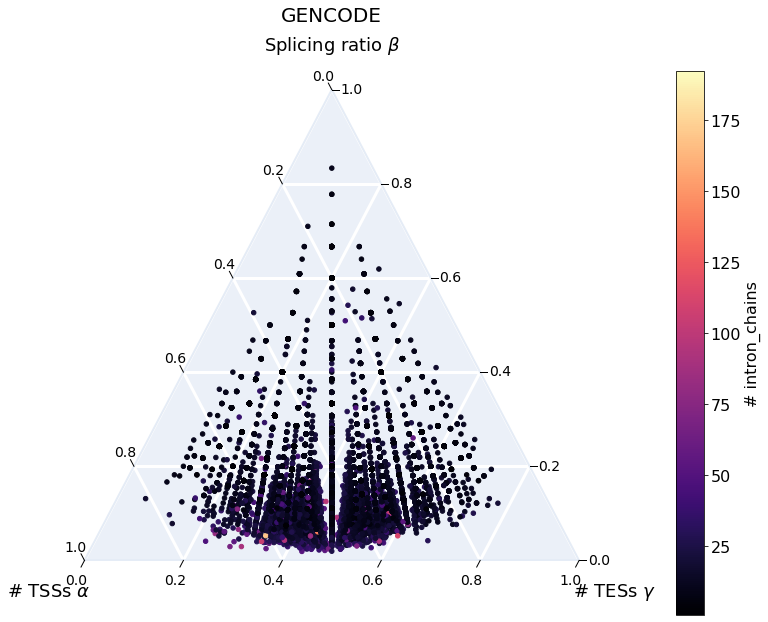

In [28]:
# gencode example - color by n ic
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            subset={'source':'GENCODE'},
            title='GENCODE')

## Counting genes in different GISX regions

In [36]:
def count_gisx_region_genes(df, source, tss, tes, spl):
    df = df.loc[df.source == source].copy(deep=True)
    df['total'] = df.tss+df.tes+df.splicing_ratio
    df['tss_ratio'] = df.tss / df.total
    df['tes_ratio'] = df.tes / df.total
    df['spl_ratio'] = df.splicing_ratio / df.total
    
    t = len(df.index)
    print('{} genes are in {}'.format(t, source))
    
    # tss-high
    n = len(df.loc[df.tss_ratio > tss].index)
    print('{} ({:.2f}%) genes are TSS-high in {}'.format(n, (n/t)*100, source))
    
    # tes-high
    n = len(df.loc[df.tes_ratio > tes].index)
    print('{} ({:.2f}%) genes are TES-high in {}'.format(n, (n/t)*100, source))
    
    # splicing-high
    n = len(df.loc[df.spl_ratio > spl].index)
    print('{} ({:.2f}%) genes are splicing-high in {}'.format(n, (n/t)*100, source))
    
    # simple genes
    n = len(df.loc[(df.tss_ratio <= tss)&(df.tes_ratio <= tes)&(df.spl_ratio <= spl)].index)
    print('{} ({:.2f}%) genes are simple in {}'.format(n, (n/t)*100, source))
    

# GENCODE
count_gisx_region_genes(counts, 'GENCODE', .5, .5, .5)

# observed
count_gisx_region_genes(counts, 'obs', .5, .5, .5)

58780 genes are in GENCODE
3096 (5.27%) genes are TSS-high in GENCODE
3599 (6.12%) genes are TES-high in GENCODE
195 (0.33%) genes are splicing-high in GENCODE
51890 (88.28%) genes are simple in GENCODE
25198 genes are in obs
1761 (6.99%) genes are TSS-high in obs
1617 (6.42%) genes are TES-high in obs
890 (3.53%) genes are splicing-high in obs
20930 (83.06%) genes are simple in obs


## How many GENCODE genes are (1,1,1)?

In [21]:
counts = pd.read_csv('triplets.tsv', sep='\t')
c = counts.loc[counts.source == 'GENCODE'].copy(deep=True)
# c = c.loc[c.biotype == 'protein_coding']
t = len(c.index)
n = len(c.loc[(c.tss==1)&(c.tes==1)&(c.intron_chain==1)].index)
print('{} / {} ({:.2f}%) polyA genes in GENCODE have triplet (1,1,1)'.format(n,t,(n/t)*100))

36296 / 58780 (61.75%) polyA genes in GENCODE have triplet (1,1,1)


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


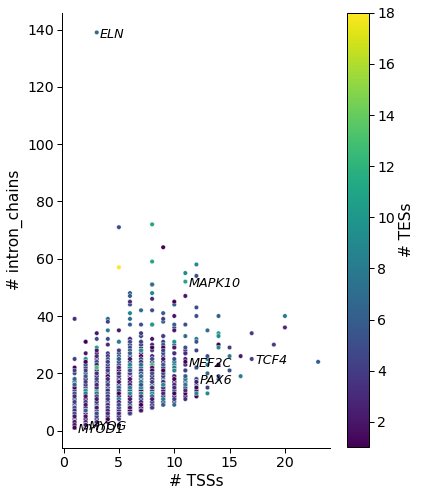

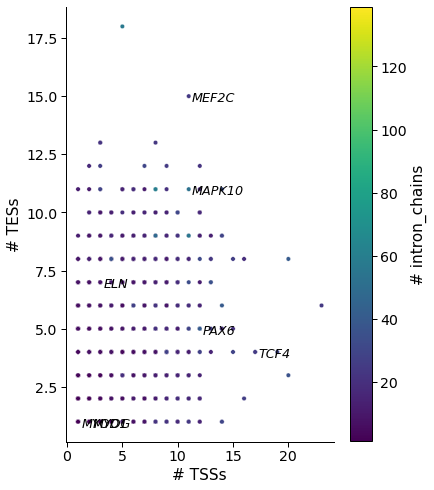

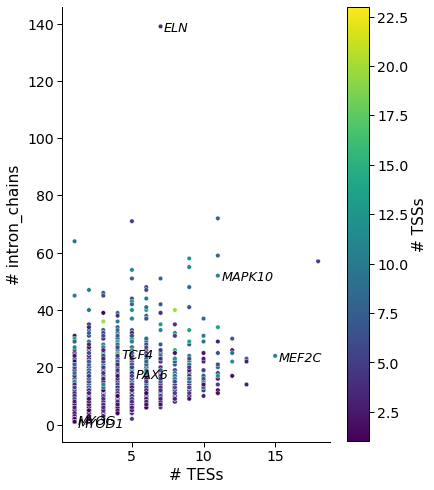

In [29]:
genes = ['PAX6', 'TCF4', 'MAPK10', 'ELN', 'MEF2C', 'MYOD1', 'MYOG']
plot_n_ic_tss_tes(counts.loc[counts.source=='obs'], 
                  label_genes=genes,
                  kind='obs',
                  opref='figures/human')

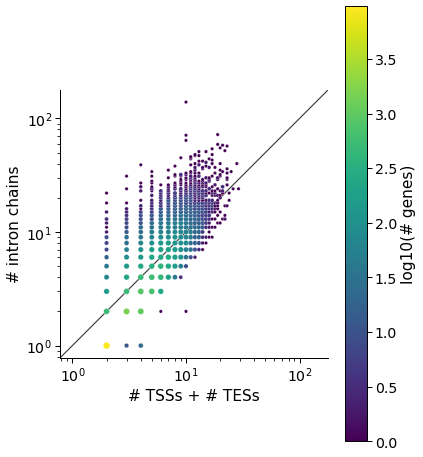

In [30]:
plot_genes_n_ic_ends(counts.loc[counts.source=='obs'], 
                     kind='obs', 
                     opref='figures/human')

In [31]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

# add 90% set triplets
df = pd.read_csv('../swan/isos_sample_gene_90.tsv', sep='\t')
temp = compute_triplets(t_df,
                        df, 
                        groupby='sample')
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 559881
# genes >= 1 tpm: 274347
Applying gene type and novelty subset
Averaging over biosample
Found 49 total samples
Number of genes reported: 33635


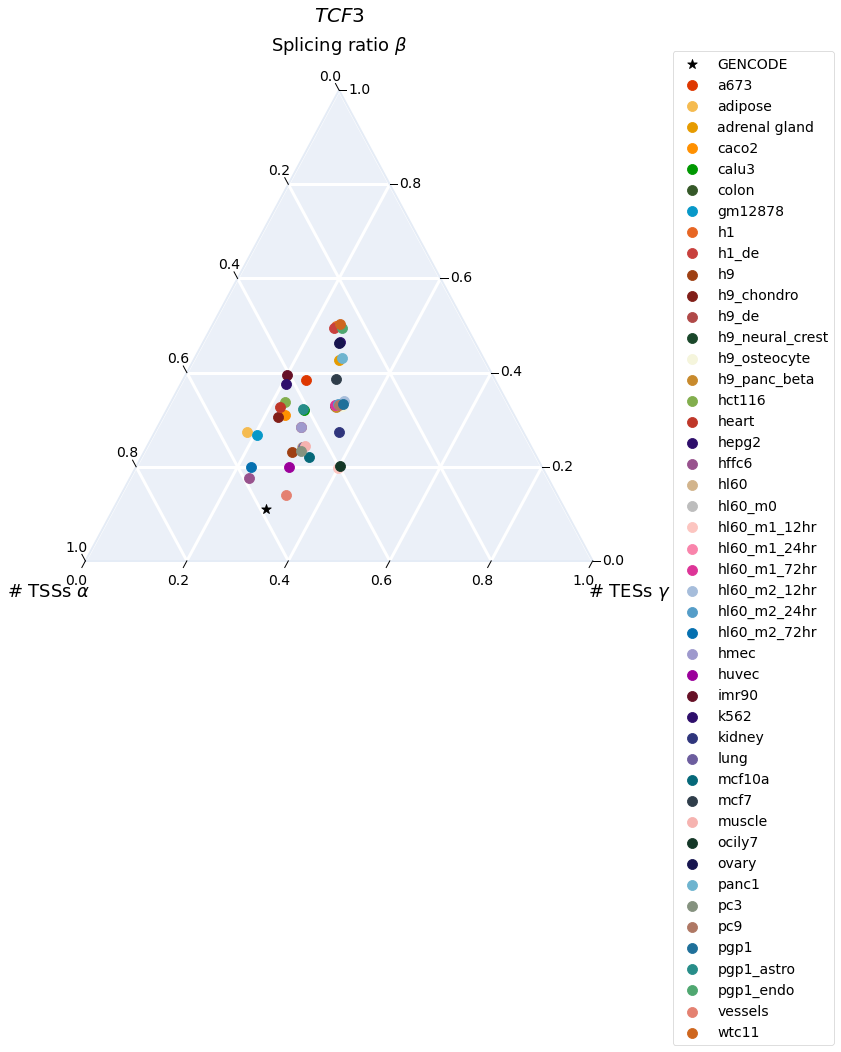

In [32]:
# gene example
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=c_dict,
            jitter=True,
            mmap={'GENCODE': '*'},
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

In [29]:
# counts.loc[counts.gname == 'TCF3']

## Sectors

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
counts = pd.read_csv('triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['tss', 'splicing', 'tes']


source    sector  n_genes  total_genes  % annotated / observed genes
1  GENCODE  splicing      195        58780                      0.331745
2  GENCODE       tes     3599        58780                      6.122831
3  GENCODE       tss     3096        58780                      5.267098
1      obs  splicing      890        25198                      3.532026
2      obs       tes     1617        25198                      6.417176
3      obs       tss     1761        25198                      6.988650

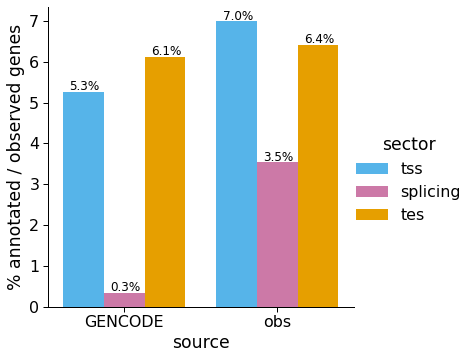

In [3]:
plot_sector_gene_counts(counts)

## GO on different sectors
Observed data only

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [15]:
counts = pd.read_csv('triplets.tsv', sep='\t')
counts = counts.loc[counts.source == 'obs']
counts = assign_gisx_sector(counts)

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
counts.head()

tss  intron_chain  tes  tss_ic_tes  splicing_ratio source  \
117560    5             7    4           7        1.555556    obs   
117561    1             1    1           1        1.000000    obs   
117562    1             8    3           8        4.000000    obs   
117563    3             5    3           5        1.666667    obs   
117564    5             7    3           7        1.750000    obs   

                       gid     gname         biotype biotype_category     tf  \
117560  ENSG00000000003.14    TSPAN6  protein_coding   protein_coding  False   
117561   ENSG00000000005.5      TNMD  protein_coding   protein_coding  False   
117562  ENSG00000000419.12      DPM1  protein_coding   protein_coding  False   
117563  ENSG00000000457.13     SCYL3  protein_coding   protein_coding  False   
117564  ENSG00000000460.16  C1orf112  protein_coding   protein_coding  False   

       biosample  tpm      total  tss_ratio  tes_ratio  spl_ratio  sector  
117560       NaN  NaN  10.555556   0.473684   0.378947   0.147368  simple  
117561       NaN  NaN   3.000000   0.333333   0.333333   0.333333  simple  
117562       NaN  NaN   8.000000   0.125000   0.375000   0.500000  simple  
117563       NaN  NaN   7.666667   0.391304   0.391304   0.217391  simple  
117564       NaN  NaN   9.750000   0.512821   0.307692   0.179487     tss

In [19]:
for sect in ['tss', 'tes', 'splicing']:
    print('Performing GO for {}...'.format(sect))
    df = counts.loc[counts.sector == sect].copy(deep=True)
    
    dbs = ['GO_Biological_Process_2021',
       'GO_Cellular_Component_2021',
       'GO_Molecular_Function_2021',
       'KEGG_2021_Human']
    bm = gp.parser.Biomart()
    datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
    datasets.loc[datasets.Description.str.contains('Human')]
    
    gids = df.gid.str.rsplit('.', n=1, expand=True)[0].to_frame()
    gids = gids.squeeze().str.strip().tolist()
    gids = bm.query(dataset='hsapiens_gene_ensembl',
               attributes=['ensembl_gene_id', 'external_gene_name'],
               filters={'ensembl_gene_id': gids})
    gids = gids.loc[~gids.external_gene_name.isna()]
    gnames = gids.external_gene_name.squeeze().str.strip().tolist()
    desc = '{}_sector_genes'.format(sect)
    odir = '{}_sector_genes_GO'.format(sect)
    go = gp.enrichr(gene_list=gnames,
                    gene_sets=dbs,
                    organism='Human',
                    description=desc,
                    outdir=odir,
                    cutoff=0.5)

Performing GO for tss...
Performing GO for tes...
Performing GO for splicing...
